NBA Predictive Analytics

Overview:
    This capstone project aims to predict the outcomes of NBA games. Leveraging historical game data, the project applies machine learning techniques to understand the patterns and factors that influence game results. RandomForestClassifier and ExtraTreesClassifier are the primary algorithms used, with a focus on optimizing their parameters for better performance.
    While a perfect prediction model—which is an impossible target in the unpredictable realm of sports—it was to develop a reliable predictive framework that could potentially assist in informed decision-making for sports analysts, bettors, and enthusiasts and create an avenue to either imrpove the odds in the favor of the consumer or aid in the implementation of creating a winning model for a sportbooks to use to mitigate risk of loss.

Business Understanding:  Online and in sportsbook beting is a quickly growing business as more and more states have made sports betting legal.  2024 is project to have almost 50 billion dollars in revenue with a projected increase of around 8% every year by 2028(Statista, 2024) we could be talking about upwards of 70 billion in projected revenue.  With this alarming rate of growth i nthis sector being able to create a baseline model (win/loss) predictor could help either side of the business whether it be with the bettor or the house.  

Data Understanding:  This data is obtained from https://datahub.io/five-thirty-eight/nba-elo and consist of the historical data from the NBA upto the 2016 season and was compiled from basketball-reference.com.

In [23]:
#Imports Here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_auc_score,roc_curve, auc, precision_score, recall_score,f1_score
from sklearn.compose import ColumnTransformer
from scipy.stats import randint,uniform
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
import seaborn as sns

In [24]:
df = pd.read_csv("../Data/nbaallelo.csv")
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [26]:
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


Data Preparation:  
Through prep we will remove Dropping Columns: It removes the notes column, which may contain missing values and might not be necessary for your analysis. It also removes gameorder and _iscopy columns to simplify the dataset.
Converting Date Format: It converts the date_game column to the datetime format, making it easier to perform time-series analysis or filter the data based on dates.

In [27]:
# Drop the 'notes' column as it might contain many missing values and might not be essential for the analysis
df_cleaned = df.drop(columns=['notes'])

# Drop other unnecessary columns for simplification, such as 'gameorder' and '_iscopy'
df_cleaned = df_cleaned.drop(columns=['gameorder', '_iscopy'])

# Convert the 'date_game' column from string to datetime format for easier handling of dates
df_cleaned['date_game'] = pd.to_datetime(df_cleaned['date_game'])

# Display the first few rows of the cleaned dataset to ensure the changes were applied
df_cleaned.head()


,game_id,lg_id,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast
0,194611010TRH,NBA,1947,1946-11-01,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065
1,194611010TRH,NBA,1947,1946-11-01,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935
2,194611020CHS,NBA,1947,1946-11-02,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101
3,194611020CHS,NBA,1947,1946-11-02,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899
4,194611020DTF,NBA,1947,1946-11-02,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065


In [28]:
# Replace 'target_column' with your actual target variable name
X = df_cleaned.drop('game_result', axis=1) 
y = df_cleaned['game_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:
encoder = LabelEncoder()
categorical_features = ['game_location', 'game_result','game_id']
for feature in categorical_features:
    df_cleaned[feature] = encoder.fit_transform(df[feature])
df_cleaned['avg_pts'] = df.groupby('team_id')['pts'].transform(lambda x: x.expanding().mean())



udnerstanding data relationally: By visualizing the correlation matrix with a heatmap, you can easily identify highly correlated features. High correlation between two features means they carry similar information.

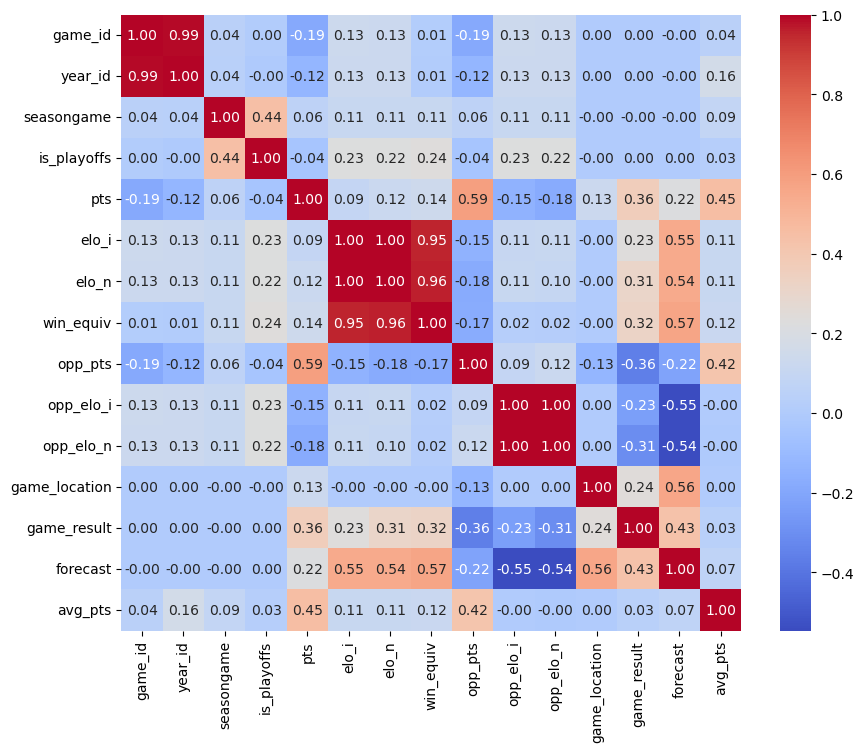

In [30]:
# Select only the numeric columns from the DataFrame
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Now compute the correlation matrix on the numeric columns only
correlation_matrix = numeric_df.corr()

# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


From the heatmap, we can see that some features have a very high positive correlation with each other, such as game_id and year_id (0.99), which suggests they might convey similar information and one of them could potentially be redundant. We also observe a high positive correlation between elo_i and elo_n, and between opp_elo_i and opp_elo_n. On the other hand, there are features with little to no correlation to others, indicated by the near-white squares.

In [ ]:
Modeling:

In [31]:
# Manually encode 'game_location' using get_dummies for simplicity
df_encoded = pd.get_dummies(df_cleaned, columns=['game_location'], drop_first=True)

# adding elo difference to the dataframe
df_encoded['elo_diff'] = df_encoded['elo_i'] - df_encoded['opp_elo_i']

# Select features, ensuring they are unique and correctly referenced
features = ['seasongame', 'is_playoffs', 'avg_pts', 'elo_i', 'opp_elo_i', 'elo_diff'] + [col for col in df_encoded.columns if 'game_location' in col]
target = 'game_result'  # Assuming this is your target variable

# Separate features (X) and target (y)
X = df_encoded[features]
y = df_encoded[target]

# StandardScaler for numerical features
scaler = StandardScaler()
X_scaled = X.copy()  # Create a copy of X to apply scaling
numeric_features = ['seasongame', 'avg_pts', 'elo_i', 'opp_elo_i', 'elo_diff']  # Numeric features to scale
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

# Now X_scaled is ready for model training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Implementation of my Dummy Classifier serves as a simple model that uses rules to make predictions. This will serve as my starting point for improvements.

In [32]:
# Initialize the dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Fit the dummy classifier to the training data
dummy_clf.fit(X_train, y_train)

# Predict the labels for the test set
y_dummy_pred = dummy_clf.predict(X_test)

# Evaluate the dummy classifier
dummy_accuracy = accuracy_score(y_test, y_dummy_pred)
print(f"Baseline Dummy Model Accuracy: {dummy_accuracy:.2f}")

# Optionally, print a classification report for more detailed performance analysis
print(classification_report(y_test, y_dummy_pred))


Baseline Dummy Model Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     12557
           1       0.00      0.00      0.00     12706

    accuracy                           0.50     25263
   macro avg       0.25      0.50      0.33     25263
weighted avg       0.25      0.50      0.33     25263



C:\Users\jacob\anaconda3\envs\capstone\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\anaconda3\envs\capstone\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\anaconda3\envs\capstone\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

print("Classification Report:")
print(classification_report)

print("Confusion Matrix:")
print(confusion_matrix)


In [24]:
# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='mlogloss')

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

print("Classification Report:")
print(class_report)

print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66     12557
           1       0.67      0.65      0.66     12706

    accuracy                           0.66     25263
   macro avg       0.66      0.66      0.66     25263
weighted avg       0.66      0.66      0.66     25263

Confusion Matrix:
[[8429 4128]
 [4468 8238]]


In [36]:
# Define the parameter space to search over
param_distributions = {
    'max_depth': randint(3, 11),  
    'min_child_weight': randint(1, 11),
    'subsample': uniform(0.5, 0.5),  
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
    'learning_rate': uniform(0.01, 0.29),  
    'n_estimators': randint(50, 201)
}

# Initialize the classifier
xgb_clf = XGBClassifier(use_label_encoder=False)

# Set up the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_distributions,
    n_iter=100,  
    scoring='accuracy',  
    cv=5,  
    random_state=42,  
    verbose=1,  
    n_jobs=-1 
)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'colsample_bytree': 0.7553736512887829, 'gamma': 0.2087055015743895, 'learning_rate': 0.07441126503651176, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 108, 'subsample': 0.6616014660103776}
Best score found:  0.6831501293221922


Hyperparameter Tuning with XGBoost:  use of grid search cross val to explore than range of values for the hyperparameters of xgboost.  The combined approach starts with RandomizedSearchCV to narrow down the search space quickly and identify promising regions. Once these regions are found, GridSearchCV performs a more exhaustive search within these regions to find the best hyperparameters.

In [31]:
#refined parameter grid based on the results from RandomizedSearchCV
param_grid = {
    'max_depth': [4, 5, 6],  # Narrowed down range around the best found
    'min_child_weight': [9, 10, 11],  # Narrowed down range around the best found
    'subsample': [0.6, 0.65, 0.7],  # Narrowed down range around the best found
    'colsample_bytree': [0.7, 0.75, 0.8],  # Narrowed down range around the best found
    'gamma': [0.15, 0.2, 0.25],  # Narrowed down range around the best found
    'learning_rate': [0.05, 0.07, 0.09],  # Narrowed down range around the best found
    'n_estimators': [100, 108, 115]  # Narrowed down range around the best found
}

# Initialize the classifier with the same settings as used in RandomizedSearchCV
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV with the refined parameter grid
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=5,  
    verbose=2,  
    n_jobs=-1  
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score achieved with GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best parameters found:  {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.09, 'max_depth': 5, 'min_child_weight': 9, 'n_estimators': 100, 'subsample': 0.65}
Best score found:  0.6839319028876722


In [33]:
# Best parameters from GridSearchCV

best_params = {
    'colsample_bytree': 0.75,
    'gamma': 0.2,
    'learning_rate': 0.09,
    'max_depth': 5,
    'min_child_weight': 9,
    'n_estimators': 100,
    'subsample': 0.65
}

# Initialize the XGBClassifier with the best parameters
xgb_clf_best = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')

# Fit the model with the best parameters to the training data
xgb_clf_best.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.09, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=9, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Model Evaluation:

In [40]:
# Make predictions on the test data
y_pred = xgb_clf_best.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, xgb_clf_best.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.6798
Precision: 0.6828
Recall: 0.6787
F1 Score: 0.6807
ROC AUC: 0.7461


Running a comprehensive set of metrics like Accuracy, Precision, Recall, F1 Score, and ROC AUC provides a multidimensional view of a classification model's performance. Each metric can give you different insights into the strengths and weaknesses of your model

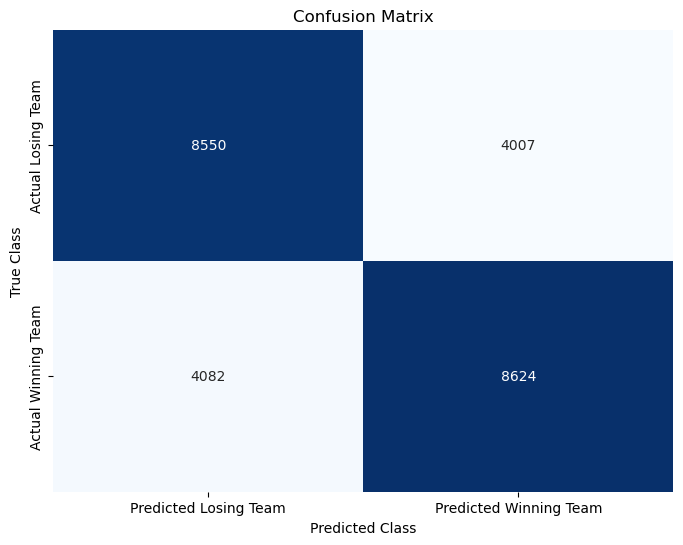

In [41]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#DataFrame from the confusion matrix for label customization
cm_df = pd.DataFrame(cm, 
                     index=['Actual Losing Team', 'Actual Winning Team'], 
                     columns=['Predicted Losing Team', 'Predicted Winning Team'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


This confusion matrix displays the performance of my classification model in predicting the winning and losing teams.

True Negative (TN): 8550 - The model correctly predicted the losing team 8550 times.
False Positive (FP): 4007 - The model incorrectly predicted the losing team as the winning team 4007 times.
False Negative (FN): 4082 - The model incorrectly predicted the winning team as the losing team 4082 times.
True Positive (TP): 8624 - The model correctly predicted the winning team 8624 times.
From these values, we can derive the following insights:

We can interpret from this that the model is better at correctly identifying winning teams than losing teams, as indicated by a higher number of true positives, compared to true negatives.
The number of false positives and false negatives is relatively balanced, suggesting the model doesn't have a strong bias toward predicting one class over the other.

Conclusions:

This project embarked on the challenging journey of predicting sports game outcomes, specifically focusing on determining winning and losing teams. Utilizing dataset comprising team statistics, player performances, and historical match data, we employed machine learning techniques to unravel patterns indicative of game results.

In the initial phase, exploratory data analysis provided us with an understanding of the underlying data structure and relationships, guiding our feature selection and engineering process. The development of a classification model, XGBoost was a calculated decision based on the categorical nature of our target variable—win or loss.

Throughout the iterative modeling process, using RandomizedSearchCV to scan through the hyperparameter space. This search was used in honing in on best case hyperparameter. GridSearchCV allowed us to fine-tune the model, resulting in an optimized set of hyperparameters that enhanced our model's predictive abilities.

The evaluation phase employed a comprehensive set of metrics to ensure a multidimensional assessment of our model's performance. The accuracy of approximately 68% alongside other metrics like precision, recall, and an ROC AUC of 0.7461, provided us with the confidence that our model could discern between winners and losers effectively. The confusion matrix further crystalized our understanding by quantifying true positives and true negatives, as well as the errors made.

While the project's goal was not to yield a perfect prediction model—which is an impossible target in the unpredictable realm of sports—it was to develop a reliable predictive framework that could potentially assist in informed decision-making for sports analysts, bettors, and enthusiasts.

Reflecting on the steps undertaken, from data preprocessing to model evaluation, this project not only achieved a model of satisfactory predictive capability but also laid down a methodical approach that can be replicated and refined for similar predictive tasks in sports analytics. 

The classification model built as part of this capstone project shows a  practical application of machine learning in sports analytics. It provides a valuable tool that, with further refinement and real-time data integration, could become an indispensable asset for strategic planning and forecasting in competitive sports scenarios.


Reference list entry:
Statista. (2024). Online Sports Betting in the United States. Retrieved from https://www.statista.com/outlook/dmo/eservices/online-gambling/online-sports-betting/united-states